In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_csv('/content/drive/MyDrive/emotionClassifier.txt',delimiter=';',header=None)

In [5]:
df

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
df.rename(columns={0:'Message',1:'Emotion'},inplace=True)

In [7]:
df

,Message,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [9]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [10]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

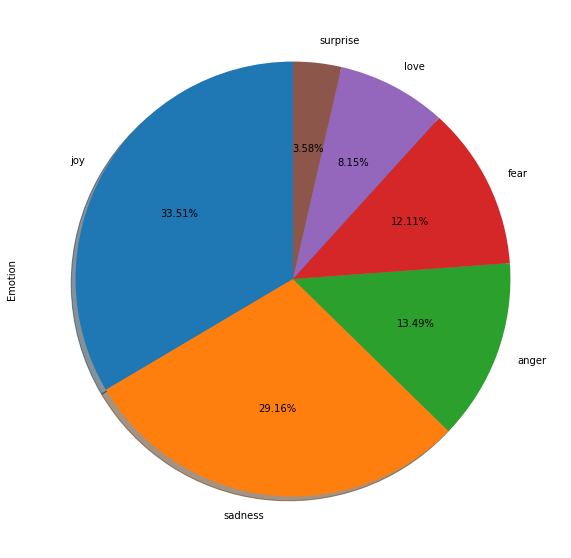

In [11]:
plt.figure(figsize=(10,10))
df['Emotion'].value_counts().plot.pie(autopct='%.2f%%',startangle=90,shadow=True)
plt.show()

<Axes: xlabel='Emotion', ylabel='Count'>

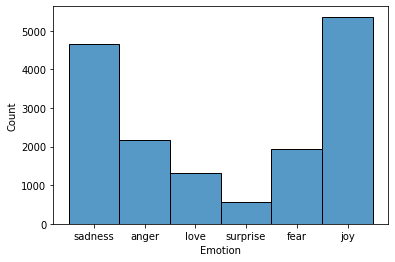

In [12]:
sns.histplot(df['Emotion'])

In [56]:
str_null=[]
for ind,msg,emo in df.itertuples():
  if type(msg)==str:
    if msg.isspace():
      str_null.append(ind)

In [57]:
str_null

[]

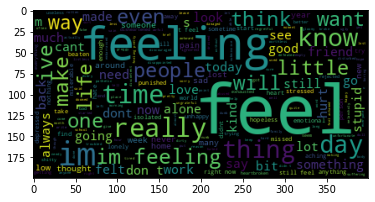

In [15]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Emotion']=="sadness"]['Message'])))
plt.imshow(wc)
plt.show()


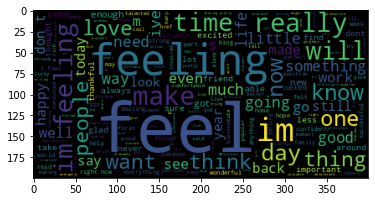

In [16]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Emotion']=="joy"]['Message'])))
plt.imshow(wc)
plt.show()


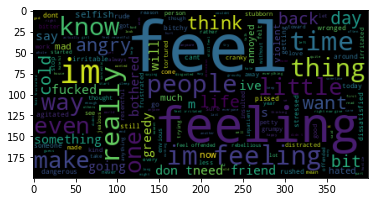

In [17]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Emotion']=="anger"]['Message'])))
plt.imshow(wc)
plt.show()


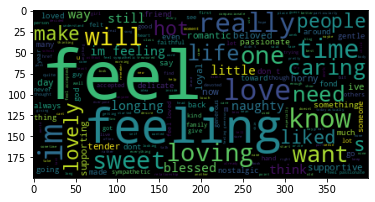

In [18]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Emotion']=="love"]['Message'])))
plt.imshow(wc)
plt.show()


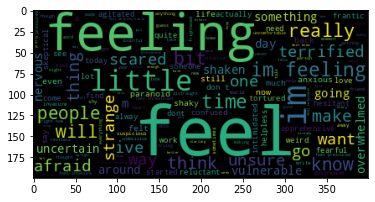

In [19]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Emotion']=="fear"]['Message'])))
plt.imshow(wc)
plt.show()


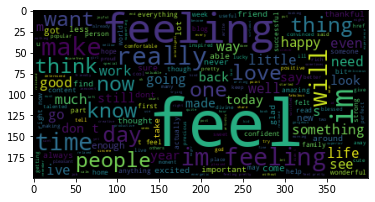

In [20]:
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(" ".join((df[df['Emotion']=="joy"]['Message'])))
plt.imshow(wc)
plt.show()


In [21]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download("wordnet")


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
def clean_sent(text):
  #tokenization and case conversion
  token=word_tokenize(text.lower())
  #token--->list of tokens
  #removing non alpha char
  ftoken=[i for i in token if i.isalpha()]
  #ftoken-----> list
  sw=stopwords.words("english")
  stokens=[i for i in ftoken if i not in sw]
  #stokens--->list
  #lemmatization
  lemma=WordNetLemmatizer()
  ltoken=[lemma.lemmatize(i) for i in stokens]
  #ltoken--->list
  #joining all tokens
  return " ".join(ltoken)

In [26]:
df['Message']=df['Message'].astype('str')

In [27]:
df['Message']=df['Message'].apply(clean_sent)

In [28]:
df.head()


,Message,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [29]:
X=df['Message']

In [30]:
y=df['Emotion']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vec=TfidfVectorizer()

In [35]:
vec.fit(X)

TfidfVectorizer()

In [36]:
tr_vec=vec.transform(X)

In [37]:
print(vec.vocabulary_)

{'didnt': 3189, 'feel': 4362, 'humiliated': 5687, 'go': 5026, 'feeling': 4366, 'hopeless': 5614, 'damned': 2821, 'hopeful': 5612, 'around': 636, 'someone': 10971, 'care': 1706, 'awake': 837, 'im': 5801, 'grabbing': 5074, 'minute': 7501, 'post': 8979, 'greedy': 5129, 'wrong': 13320, 'ever': 4045, 'nostalgic': 8035, 'fireplace': 4472, 'know': 6591, 'still': 11279, 'property': 9224, 'grouchy': 5164, 'ive': 6259, 'little': 6922, 'burdened': 1562, 'lately': 6686, 'wasnt': 12982, 'sure': 11569, 'taking': 11707, 'milligram': 7467, 'time': 12018, 'recommended': 9583, 'amount': 419, 'fallen': 4269, 'asleep': 695, 'lot': 7016, 'faster': 4309, 'also': 375, 'like': 6861, 'funny': 4821, 'confused': 2356, 'life': 6839, 'teenager': 11799, 'jaded': 6273, 'year': 13369, 'old': 8195, 'man': 7169, 'petronas': 8704, 'performed': 8639, 'well': 13057, 'made': 7115, 'huge': 5670, 'profit': 9188, 'romantic': 10036, 'make': 7150, 'suffering': 11488, 'seeing': 10371, 'mean': 7319, 'something': 10974, 'running':

In [38]:
vec_words=vec.vocabulary_

In [39]:
vec.get_feature_names_out()

array(['aa', 'aaaaaaand', 'aaaaand', ..., 'zum', 'zumba', 'zz'],
      dtype=object)

In [40]:
for i in vec.get_feature_names_out():
  idx=vec_words.get(i)
  print(f" Word {i} -:{vec.idf_[idx]}")

Streaming output truncated to the last 5000 lines.
 Word palm -:9.070968586834773
 Word palpably -:9.98725931870893
 Word pam -:9.98725931870893
 Word pampered -:9.581794210600766
 Word pan -:9.98725931870893
 Word pander -:9.98725931870893
 Word pandora -:9.98725931870893
 Word panel -:9.581794210600766
 Word pang -:8.600964957589039
 Word pani -:9.98725931870893
 Word panic -:8.600964957589039
 Word panicked -:9.581794210600766
 Word panicky -:9.070968586834773
 Word panorma -:9.98725931870893
 Word pant -:8.600964957589039
 Word panther -:9.98725931870893
 Word panty -:9.070968586834773
 Word pap -:9.98725931870893
 Word papa -:9.98725931870893
 Word papamoka -:9.98725931870893
 Word paparazzo -:9.98725931870893
 Word paper -:7.2464192947837285
 Word papermakeupstamps -:9.98725931870893
 Word paperwork -:9.98725931870893
 Word par -:9.98725931870893
 Word parable -:9.98725931870893
 Word parade -:9.98725931870893
 Word paragraph -:9.581794210600766
 Word parallel -:9.294112138148984

In [41]:
X=tr_vec.toarray()

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=123)


In [49]:
from sklearn.metrics import classification_report

In [50]:
def mymodel(model_obj):
  model_obj.fit(xtrain,ytrain)
  ypred=model_obj.predict(xtest)
  print(classification_report(ytest,ypred))
  return model_obj


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier(5)

In [53]:

mymodel(knn)

              precision    recall  f1-score   support

       anger       0.74      0.77      0.75       657
        fear       0.75      0.69      0.72       588
         joy       0.79      0.86      0.82      1654
        love       0.78      0.52      0.62       385
     sadness       0.81      0.82      0.81      1367
    surprise       0.64      0.46      0.54       149

    accuracy                           0.78      4800
   macro avg       0.75      0.69      0.71      4800
weighted avg       0.78      0.78      0.77      4800



KNeighborsClassifier()

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier()

In [60]:
mymodel(rf)

              precision    recall  f1-score   support

       anger       0.89      0.85      0.87       657
        fear       0.87      0.83      0.85       588
         joy       0.88      0.94      0.91      1654
        love       0.85      0.75      0.79       385
     sadness       0.92      0.91      0.91      1367
    surprise       0.70      0.77      0.73       149

    accuracy                           0.88      4800
   macro avg       0.85      0.84      0.84      4800
weighted avg       0.88      0.88      0.88      4800



RandomForestClassifier()

In [97]:
def result_msg(msg):
  clean_msg=clean_sent(msg)
  x_msg=vec.transform([clean_msg]).toarray()
  pred=rf.predict(x_msg)[0]
  print(pred)

In [99]:
result_msg('I am shocked')

surprise


In [101]:
result_msg('I like it')

joy


In [103]:
result_msg('I am felling good')

joy


In [108]:
result_msg('I hate this thing so much it makes me unhappy')

sadness


In [110]:
result_msg('I hate the people who are greedy')

anger


In [111]:
result_msg('Something strange gonna happen')

fear


In [112]:
result_msg('I am terrified about your future')

fear


In [113]:
result_msg('The weather is lovely outside')

love


In [114]:
result_msg('I am felling top of the world')

joy


In [119]:
result_msg('Poor guy!! I feel unhappy for him')

sadness
